Using device: cuda
Loading data...
Initial dataset shape: (7139, 5)

Cleaning labels...
Unique values in Document Tag: ['Fake News' 'Undefined' 'Fact News']
Dataset shape after filtering: (4599, 7)

Label distribution after cleaning:
label
1.0    2522
0.0    2077
Name: count, dtype: int64

Label distribution (proportions):
label
1.0    0.54838
0.0    0.45162
Name: proportion, dtype: float64

Processing text...

Training set size: 4369
Test set size: 230

Augmenting data...


100%|██████████| 4369/4369 [00:04<00:00, 1025.75it/s]


Training set size after augmentation: 6765

Tokenizing text...
Vocabulary size: 23165
Tokenizer saved as 'tokenizer.pickle'.

Class weights: tensor([1.7144, 0.7059])
Class weights saved as 'class_weights.pth'.

Starting training...

Epoch 1/30


Train Loss: 0.3930 | Train Acc: 0.8288
Val Loss: 0.5657 | Val Acc: 0.8130
Best model checkpoint saved as 'best_model_checkpoint.pth'.

Epoch 2/30


Train Loss: 0.2161 | Train Acc: 0.9224
Val Loss: 0.3411 | Val Acc: 0.8913
Best model checkpoint saved as 'best_model_checkpoint.pth'.

Epoch 3/30


Train Loss: 0.1425 | Train Acc: 0.9531
Val Loss: 0.7253 | Val Acc: 0.9130
Best model checkpoint saved as 'best_model_checkpoint.pth'.

Epoch 4/30


Train Loss: 0.0977 | Train Acc: 0.9661
Val Loss: 0.3511 | Val Acc: 0.9043
Trigger Times: 1

Epoch 5/30


Train Loss: 0.0691 | Train Acc: 0.9808
Val Loss: 0.8119 | Val Acc: 0.9043
Trigger Times: 2

Epoch 6/30


Train Loss: 0.0534 | Train Acc: 0.9851
Val Loss: 0.3984 | Val Acc: 0.9130
Trigger Times: 3

Epoch 7/30


Train Loss: 0.0459 | Train Acc: 0.9863
Val Loss: 0.2644 | Val Acc: 0.9261
Best model checkpoint saved as 'best_model_checkpoint.pth'.

Epoch 8/30


Train Loss: 0.0307 | Train Acc: 0.9928
Val Loss: 0.4056 | Val Acc: 0.9130
Trigger Times: 1

Epoch 9/30


Train Loss: 0.0332 | Train Acc: 0.9901
Val Loss: 0.5716 | Val Acc: 0.9174
Trigger Times: 2

Epoch 10/30


Train Loss: 0.0325 | Train Acc: 0.9904
Val Loss: 0.3592 | Val Acc: 0.9087
Trigger Times: 3

Epoch 11/30


Train Loss: 0.0285 | Train Acc: 0.9926
Val Loss: 0.3861 | Val Acc: 0.9304
Best model checkpoint saved as 'best_model_checkpoint.pth'.

Epoch 12/30


Train Loss: 0.0283 | Train Acc: 0.9923
Val Loss: 0.3921 | Val Acc: 0.9261
Trigger Times: 1

Epoch 13/30


Train Loss: 0.0168 | Train Acc: 0.9954
Val Loss: 0.4842 | Val Acc: 0.9174
Trigger Times: 2

Epoch 14/30


Train Loss: 0.0271 | Train Acc: 0.9920
Val Loss: 0.3656 | Val Acc: 0.9217
Trigger Times: 3

Epoch 15/30


Train Loss: 0.0142 | Train Acc: 0.9960
Val Loss: 0.4759 | Val Acc: 0.9174
Trigger Times: 4

Epoch 16/30


Train Loss: 0.0133 | Train Acc: 0.9965
Val Loss: 0.5204 | Val Acc: 0.9000
Trigger Times: 5

Epoch 17/30


Train Loss: 0.0173 | Train Acc: 0.9939
Val Loss: 0.4849 | Val Acc: 0.9000
Trigger Times: 6

Epoch 18/30


Train Loss: 0.0098 | Train Acc: 0.9975
Val Loss: 0.6501 | Val Acc: 0.9043
Trigger Times: 7

Epoch 19/30


Train Loss: 0.0179 | Train Acc: 0.9953
Val Loss: 0.3898 | Val Acc: 0.9174
Trigger Times: 8

Epoch 20/30


Train Loss: 0.0115 | Train Acc: 0.9970
Val Loss: 0.9313 | Val Acc: 0.9174
Trigger Times: 9

Epoch 21/30


C:\Users\sirap\AppData\Local\Temp\ipykernel_25896\126220495.py:491: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('best_model_checkpoint.pth', map_lo

Train Loss: 0.0146 | Train Acc: 0.9966
Val Loss: 0.6617 | Val Acc: 0.9261
Trigger Times: 10
Early stopping!
Best model loaded successfully.

Evaluating the best model on the test set...



Test Loss: 0.3861
Test Accuracy: 0.9304

Classification Report:
              precision    recall  f1-score   support

   Fact News       0.96      0.88      0.92       104
   Fake News       0.91      0.97      0.94       126

    accuracy                           0.93       230
   macro avg       0.93      0.93      0.93       230
weighted avg       0.93      0.93      0.93       230



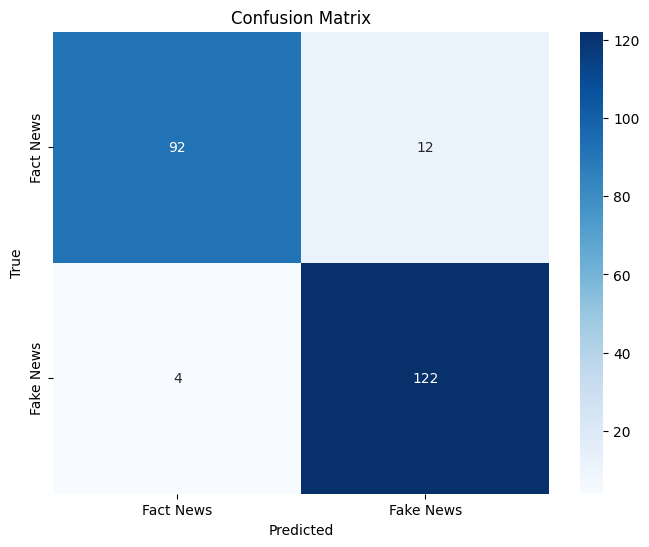

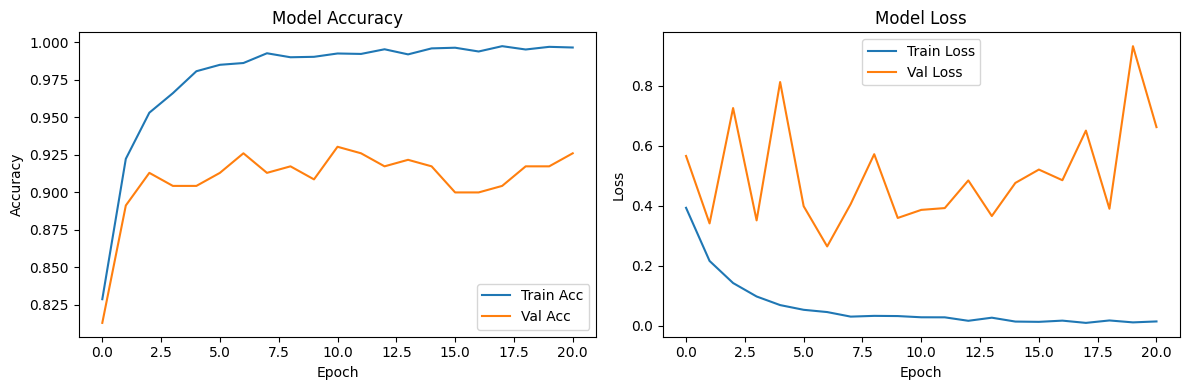

In [1]:
# Install necessary libraries
# Uncomment the following lines if running in a new environment
# !pip install pythainlp
# !pip install sklearn
# !pip install torch torchvision torchaudio
# !pip install tqdm
# !pip install matplotlib seaborn

# Import necessary libraries
import numpy as np
import pandas as pd
import pickle
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report

# PyTorch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Thai language processing
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords

# For progress bar
from tqdm import tqdm

# Keras Tokenizer and pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set random seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# Utility Functions
def clean_text(text):
    """Clean and normalize text"""
    if isinstance(text, list):
        text = ' '.join(map(str, text))
    elif pd.isna(text):
        text = ''
    else:
        text = str(text)
    return text

def process_thai_text(text):
    """Process Thai text with specific handling"""
    # Clean the text first
    text = clean_text(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters but keep Thai characters
    text = re.sub(r'[^\u0E00-\u0E7Fa-zA-Z\s]', '', text)

    try:
        # Tokenize using Thai word tokenizer
        words = word_tokenize(text, engine="newmm")

        # Remove Thai stopwords and short words
        stop_words_thai = set(thai_stopwords())
        words = [w for w in words if w not in stop_words_thai and len(w) > 1]

        return ' '.join(words)
    except:
        # Fallback to simple space splitting if Thai tokenization fails
        return ' '.join(text.split())

def augment_thai_text(text, p=0.3):
    """Augment Thai text"""
    text = clean_text(text)

    try:
        # Tokenize
        words = word_tokenize(text, engine="newmm")

        # Randomly drop some words
        if random.random() < p and len(words) > 5:
            words = random.sample(words, int(len(words) * 0.8))

        # Randomly shuffle word order (while keeping some local order)
        if random.random() < p and len(words) > 5:
            for i in range(0, len(words)-2, 2):
                if random.random() < 0.5:
                    words[i], words[i+1] = words[i+1], words[i]
    except:
        words = text.split()

    return ' '.join(words)

def add_engineered_features(text):
    """Extract additional features from text"""
    text = clean_text(text)
    features = []

    # Ratio of Thai characters to total length
    thai_chars = len(re.findall(r'[\u0E00-\u0E7F]', text))
    features.append(thai_chars / (len(text) + 1))  # Add 1 to avoid division by zero

    # Number of URLs
    urls = len(re.findall(r'http\S+|www\S+|https\S+', text))
    features.append(urls)

    # Text length
    features.append(len(text))

    # Number of Thai words
    try:
        thai_words = len([w for w in word_tokenize(text, engine="newmm")
                         if re.match(r'[\u0E00-\u0E7F]+', w)])
    except:
        thai_words = 0
    features.append(thai_words)

    return features

# Data Loading and Preprocessing
def load_and_preprocess_data(filepath):
    # Load data
    print("Loading data...")
    df = pd.read_json(filepath, lines=True)
    print("Initial dataset shape:", df.shape)

    # Clean and combine text data
    df['Title'] = df['Title'].apply(clean_text)
    df['Detail'] = df['Detail'].apply(clean_text)
    df['text'] = df['Title'] + ' ' + df['Detail']

    # Clean labels and handle missing values
    print("\nCleaning labels...")
    # First, check unique values in Document Tag
    print("Unique values in Document Tag:", df['Document Tag'].unique())

    # Create label mapping for Fake News vs Fact News
    label_mapping = {"Fake News": 1.0, "Fact News": 0.0}
    df["label"] = df["Document Tag"].map(label_mapping)

    # Keep only Fake News and Fact News
    df = df[df['Document Tag'].isin(['Fake News', 'Fact News'])]

    print("Dataset shape after filtering:", df.shape)
    print("\nLabel distribution after cleaning:")
    print(df["label"].value_counts())
    print("\nLabel distribution (proportions):")
    print(df["label"].value_counts(normalize=True))

    # Process text and create features
    print("\nProcessing text...")
    df["cleaned_text"] = df["text"].apply(process_thai_text)
    df["engineered_features"] = df["text"].apply(add_engineered_features)

    return df

def augment_data(df):
    print("\nAugmenting data...")
    augmented_texts = []
    augmented_eng_features = []
    augmented_labels = []

    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        text_str = str(row['cleaned_text'])
        eng = row['engineered_features']
        label = row['label']

        # Original data
        augmented_texts.append(text_str)
        augmented_eng_features.append(eng)
        augmented_labels.append(label)

        # Add augmented version for fake news class
        if label == 1:
            aug_text = augment_thai_text(text_str)
            augmented_texts.append(aug_text)
            augmented_eng_features.append(eng)
            augmented_labels.append(label)

    # Create augmented DataFrame
    augmented_df = pd.DataFrame({
        'cleaned_text': augmented_texts,
        'engineered_features': augmented_eng_features,
        'label': augmented_labels
    })

    print(f"Training set size after augmentation: {augmented_df.shape[0]}")
    return augmented_df

# Tokenization and Padding
def tokenize_and_pad(train_texts, test_texts, maxlen=200):
    print("\nTokenizing text...")
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_texts)

    X_train_seq = tokenizer.texts_to_sequences(train_texts)
    X_test_seq = tokenizer.texts_to_sequences(test_texts)

    vocab_size = len(tokenizer.word_index)
    print(f"Vocabulary size: {vocab_size}")

    # Pad sequences
    X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding="post")
    X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding="post")

    return X_train_pad, X_test_pad, tokenizer, vocab_size

# Custom Dataset
class FakeNewsDataset(Dataset):
    def __init__(self, texts, eng_features, labels):
        self.texts = torch.tensor(texts, dtype=torch.long)
        
        # Convert the list of numpy arrays to a single numpy array first
        eng_features = np.array(eng_features)
        self.eng_features = torch.tensor(eng_features, dtype=torch.float)
        
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.texts[idx], self.eng_features[idx], self.labels[idx]


# Attention Mechanism
class AttentionLayer(nn.Module):
    def __init__(self, hidden_dim):
        super(AttentionLayer, self).__init__()
        self.attention = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        # x: [batch_size, seq_len, hidden_dim]
        e = torch.tanh(self.attention(x))  # [batch_size, seq_len, 1]
        a = torch.softmax(e, dim=1)        # [batch_size, seq_len, 1]
        output = x * a                      # [batch_size, seq_len, hidden_dim]
        output = torch.sum(output, dim=1)   # [batch_size, hidden_dim]
        return output

# Model Definition
class FakeNewsModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_eng_features):
        super(FakeNewsModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size + 1, embedding_dim, padding_idx=0)
        self.dropout = nn.Dropout(0.3)

        self.bilstm1 = nn.LSTM(embedding_dim, 256, batch_first=True, bidirectional=True)
        self.bilstm2 = nn.LSTM(512, 128, batch_first=True, bidirectional=True)

        self.attention = AttentionLayer(256)  # Since bilstm2 hidden_dim=128*2=256

        self.eng_dense = nn.Sequential(
            nn.Linear(n_eng_features, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32)
        )

        self.combined_dense = nn.Sequential(
            nn.Linear(256 + 32, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),

            nn.Linear(64, 2)  # Output layer without Softmax
        )

    def forward(self, text, eng):
        x = self.embedding(text)        # [batch_size, maxlen, embedding_dim]
        x = self.dropout(x)

        x, _ = self.bilstm1(x)         # [batch_size, maxlen, 512]
        x = self.dropout(x)

        x, _ = self.bilstm2(x)         # [batch_size, maxlen, 256]
        x = self.dropout(x)

        context = self.attention(x)    # [batch_size, 256]

        eng_features = self.eng_dense(eng)  # [batch_size, 32]

        combined = torch.cat((context, eng_features), dim=1)  # [batch_size, 288]

        out = self.combined_dense(combined)  # [batch_size, 2]

        return out

# Training Function
def train_model(model, dataloader, criterion, optimizer, device):
    model.train()
    epoch_loss = 0
    epoch_correct = 0

    for texts, eng, labels in tqdm(dataloader, desc="Training", leave=False):
        texts = texts.to(device)
        eng = eng.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(texts, eng)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * texts.size(0)
        _, preds = torch.max(outputs, 1)
        epoch_correct += (preds == labels).sum().item()

    return epoch_loss / len(dataloader.dataset), epoch_correct / len(dataloader.dataset)

# Evaluation Function
def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    epoch_loss = 0
    epoch_correct = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for texts, eng, labels in tqdm(dataloader, desc="Evaluating", leave=False):
            texts = texts.to(device)
            eng = eng.to(device)
            labels = labels.to(device)

            outputs = model(texts, eng)
            loss = criterion(outputs, labels)

            epoch_loss += loss.item() * texts.size(0)
            _, preds = torch.max(outputs, 1)
            epoch_correct += (preds == labels).sum().item()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = epoch_correct / len(dataloader.dataset)
    return epoch_loss / len(dataloader.dataset), accuracy, all_preds, all_labels

# Main Function
def main_pytorch():
    # Device configuration
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Load and preprocess data
    df = load_and_preprocess_data("Limesoda.jsonl")

    # Split data into training and test sets
    X_text = df["cleaned_text"].values
    X_eng = np.array(df["engineered_features"].tolist())
    y = df["label"].values

    X_text_train, X_text_test, X_eng_train, X_eng_test, y_train, y_test = train_test_split(
        X_text, X_eng, y, test_size=0.05, random_state=42, stratify=y
    )

    print(f"\nTraining set size: {len(X_text_train)}")
    print(f"Test set size: {len(X_text_test)}")

    # Create training DataFrame for augmentation
    train_df = pd.DataFrame({
        'cleaned_text': X_text_train,
        'engineered_features': list(X_eng_train),
        'label': y_train
    })

    # Augment data
    augmented_train_df = augment_data(train_df)

    # Tokenize and pad sequences
    X_train_pad, X_test_pad, tokenizer, vocab_size = tokenize_and_pad(
        augmented_train_df["cleaned_text"].values,
        X_text_test
    )
    maxlen = 200  # As defined earlier

    # Save the tokenizer
    with open('tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("Tokenizer saved as 'tokenizer.pickle'.")

    # Convert labels to integers
    y_train_aug = augmented_train_df["label"].values.astype(int)
    y_test = y_test.astype(int)

    # Compute class weights
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train_aug),
        y=y_train_aug
    )
    class_weights = torch.tensor(class_weights, dtype=torch.float)

    print("\nClass weights:", class_weights)
    
    # Save class weights
    torch.save(class_weights, 'class_weights.pth')
    print("Class weights saved as 'class_weights.pth'.")

    # Create Datasets and DataLoaders
    train_dataset = FakeNewsDataset(X_train_pad, augmented_train_df["engineered_features"].tolist(), y_train_aug)
    test_dataset = FakeNewsDataset(X_test_pad, X_eng_test.tolist(), y_test)

    batch_size = 32

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

    # Initialize model
    embedding_dim = 200
    n_eng_features = 4
    model = FakeNewsModel(vocab_size, embedding_dim, n_eng_features)
    model = model.to(device)

    # Define loss and optimizer
    criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
    optimizer = optim.Adam(model.parameters(), lr=2e-3)

    # Learning rate scheduler
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=1000)

    # Early stopping parameters
    best_val_acc = 0
    patience = 10
    trigger_times = 0

    num_epochs = 30
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }

    print("\nStarting training...")
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch + 1}/{num_epochs}")

        train_loss, train_acc = train_model(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, _, _ = evaluate_model(model, test_loader, criterion, device)

        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

        # Step the scheduler
        scheduler.step()

        # Early Stopping and Saving Best Model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            trigger_times = 0
            # Save the best model along with other components
            checkpoint = {
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'tokenizer': tokenizer,
                'class_weights': class_weights,
                'history': history
            }
            torch.save(checkpoint, 'best_model_checkpoint.pth')
            print("Best model checkpoint saved as 'best_model_checkpoint.pth'.")
        else:
            trigger_times += 1
            print(f"Trigger Times: {trigger_times}")
            if trigger_times >= patience:
                print("Early stopping!")
                break

    # Load the best model
    checkpoint = torch.load('best_model_checkpoint.pth', map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    print("Best model loaded successfully.")

    # Evaluate the model
    print("\nEvaluating the best model on the test set...")
    val_loss, val_acc, y_pred, y_true = evaluate_model(model, test_loader, criterion, device)
    print(f"\nTest Loss: {val_loss:.4f}")
    print(f"Test Accuracy: {val_acc:.4f}")

    # Classification Report
    print("\nClassification Report:")
    target_names = ["Fact News", "Fake News"]
    print(classification_report(y_true, y_pred, target_names=target_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=target_names,
                yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_acc'], label='Train Acc')
    plt.plot(history['val_acc'], label='Val Acc')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model, tokenizer, history


if __name__ == "__main__":
    model, tokenizer, history = main_pytorch()


In [2]:
# test_model.py

import torch
import torch.nn as nn
import pickle
import numpy as np
import pandas as pd
import re
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Attention Mechanism
class AttentionLayer(nn.Module):
    def __init__(self, hidden_dim):
        super(AttentionLayer, self).__init__()
        self.attention = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        # x: [batch_size, seq_len, hidden_dim]
        e = torch.tanh(self.attention(x))  # [batch_size, seq_len, 1]
        a = torch.softmax(e, dim=1)        # [batch_size, seq_len, 1]
        output = x * a                      # [batch_size, seq_len, hidden_dim]
        output = torch.sum(output, dim=1)   # [batch_size, hidden_dim]
        return output

# Model Definition
class FakeNewsModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_eng_features):
        super(FakeNewsModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size + 1, embedding_dim, padding_idx=0)
        self.dropout = nn.Dropout(0.3)

        self.bilstm1 = nn.LSTM(embedding_dim, 256, batch_first=True, bidirectional=True)
        self.bilstm2 = nn.LSTM(512, 128, batch_first=True, bidirectional=True)

        self.attention = AttentionLayer(256)  # Since bilstm2 hidden_dim=128*2=256

        self.eng_dense = nn.Sequential(
            nn.Linear(n_eng_features, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32)
        )

        self.combined_dense = nn.Sequential(
            nn.Linear(256 + 32, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),

            nn.Linear(64, 2)  # Output layer without Softmax
        )

    def forward(self, text, eng):
        x = self.embedding(text)        # [batch_size, maxlen, embedding_dim]
        x = self.dropout(x)

        x, _ = self.bilstm1(x)         # [batch_size, maxlen, 512]
        x = self.dropout(x)

        x, _ = self.bilstm2(x)         # [batch_size, maxlen, 256]
        x = self.dropout(x)

        context = self.attention(x)    # [batch_size, 256]

        eng_features = self.eng_dense(eng)  # [batch_size, 32]

        combined = torch.cat((context, eng_features), dim=1)  # [batch_size, 288]

        out = self.combined_dense(combined)  # [batch_size, 2]

        return out

# Helper Functions
def clean_text(text):
    """Clean and normalize text"""
    if isinstance(text, list):
        text = ' '.join(map(str, text))
    elif pd.isna(text):
        text = ''
    else:
        text = str(text)
    return text

def process_thai_text(text):
    """Process Thai text with specific handling"""
    # Clean the text first
    text = clean_text(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters but keep Thai characters
    text = re.sub(r'[^\u0E00-\u0E7Fa-zA-Z\s]', '', text)

    try:
        # Tokenize using Thai word tokenizer
        words = word_tokenize(text, engine="newmm")

        # Remove Thai stopwords and short words
        stop_words_thai = set(thai_stopwords())
        words = [w for w in words if w not in stop_words_thai and len(w) > 1]

        return ' '.join(words)
    except:
        # Fallback to simple space splitting if Thai tokenization fails
        return ' '.join(text.split())

def add_engineered_features(text):
    """Extract additional features from text"""
    text = clean_text(text)
    features = []

    # Ratio of Thai characters to total length
    thai_chars = len(re.findall(r'[\u0E00-\u0E7F]', text))
    features.append(thai_chars / (len(text) + 1))  # Add 1 to avoid division by zero

    # Number of URLs
    urls = len(re.findall(r'http\S+|www\S+|https\S+', text))
    features.append(urls)

    # Text length
    features.append(len(text))

    # Number of Thai words
    try:
        thai_words = len([w for w in word_tokenize(text, engine="newmm")
                         if re.match(r'[\u0E00-\u0E7F]+', w)])
    except:
        thai_words = 0
    features.append(thai_words)

    return features

# Prediction Function
def predict_fake_news(title, content, model, tokenizer, device, maxlen=200):
    """
    Predict whether the provided title and content constitute Fake News or Fact News.

    Args:
        title (str): The title of the news article.
        content (str): The content/body of the news article.
        model (nn.Module): The trained PyTorch model.
        tokenizer (Tokenizer): The fitted Keras tokenizer.
        device (torch.device): The device to run the model on.
        maxlen (int, optional): The maximum sequence length for padding. Defaults to 200.

    Returns:
        str: "Fake News" or "Fact News"
    """
    # Combine title and content
    combined_text = f"{title} {content}"

    # Preprocess the text
    cleaned_text = process_thai_text(combined_text)

    # Tokenize and pad the text
    sequences = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')
    input_ids = torch.tensor(padded_sequences, dtype=torch.long).to(device)

    # Extract engineered features
    engineered_features = add_engineered_features(combined_text)
    engineered_features = torch.tensor(engineered_features, dtype=torch.float).unsqueeze(0).to(device)  # Shape: [1, 4]

    # Make prediction
    with torch.no_grad():
        outputs = model(input_ids, engineered_features)
        _, preds = torch.max(outputs, 1)
        prediction = preds.item()

    # Map prediction to label
    label_map = {0: "Fact News", 1: "Fake News"}
    return label_map.get(prediction, "Unknown")

def main():
    # Device configuration
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Load the tokenizer
    try:
        with open('tokenizer.pickle', 'rb') as handle:
            tokenizer = pickle.load(handle)
        print("Tokenizer loaded successfully.")
    except FileNotFoundError:
        print("Error: 'tokenizer.pickle' not found. Please ensure the tokenizer is saved and in the correct directory.")
        return

    # Load class weights (optional)
    try:
        class_weights = torch.load('class_weights.pth', map_location=device, weights_only=True)
        print("Class weights loaded successfully.")
    except TypeError:
        # If 'weights_only' is not supported, load normally
        class_weights = torch.load('class_weights.pth', map_location=device)
        print("Class weights loaded successfully.")
    except FileNotFoundError:
        print("Warning: 'class_weights.pth' not found. Proceeding without class weights.")

    # Determine vocab_size from tokenizer
    vocab_size = len(tokenizer.word_index)
    print(f"Vocabulary size: {vocab_size}")

    # Initialize the model
    embedding_dim = 200
    n_eng_features = 4
    model = FakeNewsModel(vocab_size, embedding_dim, n_eng_features)
    model = model.to(device)

    # Load the model checkpoint
    try:
        checkpoint = torch.load('best_model_checkpoint.pth', map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        model.eval()
        print("Model loaded successfully.")
    except FileNotFoundError:
        print("Error: 'best_model_checkpoint.pth' not found. Please ensure the model checkpoint is saved and in the correct directory.")
        return
    except KeyError:
        print("Error: The checkpoint does not contain 'model_state_dict'. Please check the checkpoint file.")
        return

    # Provided Title and Content
    title = "กสม.ชง ครม.กำหนดเกณฑ์เยียวยาใหม่ หลังบางอาชีพไม่ได้เงินประกันตนช่วงโควิด"
    content = """เมื่อวันที่ 27 ธ.ค. 2567 นายวสันต์  ภัยหลีกลี้ กรรมการสิทธิมนุษยชนแห่งชาติ เปิดเผยว่า คณะกรรมการสิทธิมนุษยชนแห่งชาติ (กสม.) ในคราวประชุมด้านการคุ้มครองและส่งเสริมสิทธิมนุษยชน เมื่อวันที่ 24 ธันวาคม 2567 ได้พิจารณารายงานผลการตรวจสอบเกี่ยวกับผลกระทบจากมาตรการของรัฐในช่วงสถานการณ์การแพร่ระบาดของโรคติดเชื้อไวรัสโคโรนา 2019 (โควิด 19) กรณีร้องเรียนว่าพนักงานบริการในสถานบริการไม่ได้รับเงินเยียวยาผู้ประกันตน โดยไม่สามารถขอรับการเยียวยาได้ เนื่องจากข้อจำกัดด้านคุณสมบัติและลักษณะการทำงานที่ต้องมีการรับรองจากสมาคมหรือสมาพันธ์เครือข่ายคนบันเทิง ..."""

    # Make Prediction
    prediction = predict_fake_news(title, content, model, tokenizer, device)
    print(f"Prediction: {prediction}")

if __name__ == "__main__":
    main()


Using device: cuda
Tokenizer loaded successfully.
Class weights loaded successfully.
Vocabulary size: 23165
Model loaded successfully.
Prediction: Fact News


C:\Users\sirap\AppData\Local\Temp\ipykernel_25896\3305920308.py:218: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('best_model_checkpoint.pth', map_l

In [3]:
def test_model(title, content):
    # Device configuration
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Load the tokenizer
    try:
        with open('tokenizer.pickle', 'rb') as handle:
            tokenizer = pickle.load(handle)
        print("Tokenizer loaded successfully.")
    except FileNotFoundError:
        print("Error: 'tokenizer.pickle' not found.")
        return

    # Load class weights with weights_only=True if supported
    try:
        class_weights = torch.load('class_weights.pth', map_location=device, weights_only=True)
        print("Class weights loaded successfully with weights_only=True.")
    except TypeError:
        # If 'weights_only' is not supported
        class_weights = torch.load('class_weights.pth', map_location=device)
        print("Class weights loaded successfully without weights_only.")
    except FileNotFoundError:
        print("Warning: 'class_weights.pth' not found. Proceeding without class weights.")
        class_weights = None  # Or set to a default value

    # Initialize the model
    vocab_size = len(tokenizer.word_index)
    embedding_dim = 200
    n_eng_features = 4
    model = FakeNewsModel(vocab_size, embedding_dim, n_eng_features)
    model = model.to(device)

    # Load the model checkpoint
    try:
        checkpoint = torch.load('best_model_checkpoint.pth', map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        model.eval()
        print("Model loaded successfully.")
    except FileNotFoundError:
        print("Error: 'best_model_checkpoint.pth' not found.")
        return
    except KeyError:
        print("Error: The checkpoint does not contain 'model_state_dict'.")
        return

    # Make Prediction
    prediction = predict_fake_news(title, content, model, tokenizer, device)
    print(f"Prediction: {prediction}")


In [4]:
# Define your title and content
title = "กสม.ชง ครม.กำหนดเกณฑ์เยียวยาใหม่ หลังบางอาชีพไม่ได้เงินประกันตนช่วงโควิด"
content = """เมื่อวันที่ 27 ธ.ค. 2567 นายวสันต์  ภัยหลีกลี้ กรรมการสิทธิมนุษยชนแห่งชาติ เปิดเผยว่า คณะกรรมการสิทธิมนุษยชนแห่งชาติ (กสม.) ..."""

# Test the model
test_model(title, content)


Using device: cuda
Tokenizer loaded successfully.
Class weights loaded successfully with weights_only=True.


C:\Users\sirap\AppData\Local\Temp\ipykernel_25896\3296202487.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('best_model_checkpoint.pth', map_lo

Model loaded successfully.
Prediction: Fact News
